In [1]:
%load_ext autoreload
%autoreload 2

Load strain design data

In [2]:
import sys
sys.path.append("../src")

import pandas as pd
import matplotlib.pyplot as plt
from src.dataloader import DataLoader
from src.machinelearning import MachineLearning
from src.optimization import Optimization

# Load the data
DBTL_A = ["2X.Mh", "B.Lm", "2X.Ll", "A.Mm", "B.Ll", "A.Mh", "2X.Lm", "A.Hl", "2X.Hh", "B.Ml", "B.Mm", "2X.Lh", "B.Mh", "2X.Hl", "B.Hl", "2X.Ml", "B.Hm", "B.Lh", "B.Hh", "A.Ll", "A.Hm", "2X.Mm", "A.Hh", "A.Ml", "A.Lm", "A.Lh", "2X.Hm"]
DBTL_B = ["BL.Mm", "BL.Mh", "BL.Ml"]
FILENAME = "preprocessed_Limonene_data.csv"

data = DataLoader(FILENAME, target="Limonene")
df = data.df.copy()
df_A = df.loc[DBTL_A]
df_B = df.loc[DBTL_B]

print(f'DBTL_A shape: {df_A.shape}')
print(f'DBTL_B shape: {df_B.shape}')


'_BlockData'. The class '_BlockData' has been renamed to 'BlockData'.
(deprecated in 6.7.2) (called from
c:\Users\mexis\anaconda3\envs\main\lib\site-packages\omlt\block.py:33)
DBTL_A shape: (27, 10)
DBTL_B shape: (3, 10)


ML-based optimization

In [3]:
x, y, x_offset, x_factor, \
    y_offset, y_factor, scaled_lb, scaled_ub = data.normalization(df = df_A)


Epoch 1/100

5/5 - 2s - loss: 1.3090 - val_loss: 1.2509 - 2s/epoch - 327ms/step
Epoch 2/100
5/5 - 0s - loss: 1.1261 - val_loss: 1.1230 - 64ms/epoch - 13ms/step
Epoch 3/100
5/5 - 0s - loss: 1.0222 - val_loss: 1.0540 - 66ms/epoch - 13ms/step
Epoch 4/100
5/5 - 0s - loss: 0.9789 - val_loss: 1.0094 - 72ms/epoch - 14ms/step
Epoch 5/100
5/5 - 0s - loss: 0.9581 - val_loss: 0.9796 - 61ms/epoch - 12ms/step
Epoch 6/100
5/5 - 0s - loss: 0.9695 - val_loss: 0.9520 - 83ms/epoch - 17ms/step
Epoch 7/100
5/5 - 0s - loss: 0.9540 - val_loss: 0.9411 - 69ms/epoch - 14ms/step
Epoch 8/100
5/5 - 0s - loss: 0.9467 - val_loss: 0.9392 - 62ms/epoch - 12ms/step
Epoch 9/100
5/5 - 0s - loss: 0.9380 - val_loss: 0.9329 - 80ms/epoch - 16ms/step
Epoch 10/100
5/5 - 0s - loss: 0.9366 - val_loss: 0.9285 - 73ms/epoch - 15ms/step
Epoch 11/100
5/5 - 0s - loss: 0.9302 - val_loss: 0.9196 - 92ms/epoch - 18ms/step
Epoch 12/100
5/5 - 0s - loss: 0.9271 - val_loss: 0.9125 - 175ms/epoch - 35ms/step
Epoch 13/100
5/5 - 0s - loss: 0.919

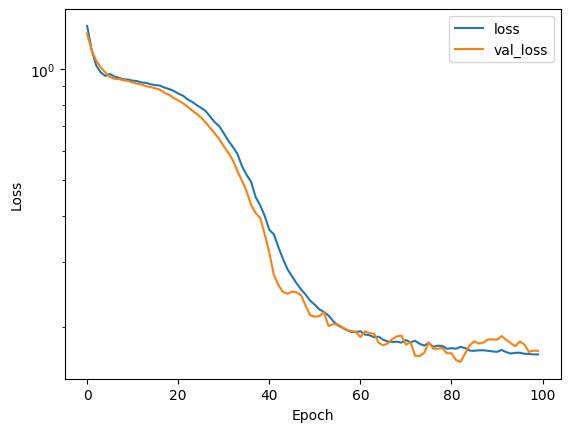

In [4]:
EPOCHS = 100
BATCH_SIZE = 4
VALIDATION_SPLIT = 0.33


net = MachineLearning(input_dim = x.shape[1], output_dim = y.shape[1], 
       num_hidden = 3, hidden_dim = 5, activation='sigmoid', lr = 0.01)

net.create_model()
net.train(x, y, EPOCHS, BATCH_SIZE, VALIDATION_SPLIT)
net.loss_curve()
net.save_model('reformer_nn.keras')

In [12]:
omlt = Optimization(model_file='reformer_nn.keras', inputs=data.inputs, outputs=data.outputs)
omlt.set_scaler(x_offset, x_factor, y_offset, y_factor, scaled_lb, scaled_ub)
omlt.load_net()
omlt.solve()

Ipopt 3.11.1: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

NOTE: You are using Ipopt by default with the MUMPS linear solver.
      Other linear solvers might be more efficient (see Ipopt documentation).


This is Ipopt version 3.11.1, running with linear solver mumps.

Number of nonzeros in equality constraint Jacobian...:      188
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       15

Total number of variables............................:       61
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       59
